# Lead Scoring Case Study

#### Study Group:
- Harsh Patel</br>
- Nikhil Jindal</br>
- Vaibbhav Nadkarnni
<hr>

## Problem Statement
An education company named X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [ ]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [ ]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Update settings to display all columns of the dataset
pd.options.display.max_columns = None

### Loading and Cleaning the data

In [ ]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the data

In [ ]:
leads_df.shape

(9240, 37)

In [ ]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Clean the dataset

In [ ]:
print(leads_df['Prospect ID'].duplicated().sum())
print(leads_df['Lead Number'].duplicated().sum())

0
0


`Prospect ID` and `Lead Number` have unique set of values which are not important for our analysis. We can choose to drop these columns

In [ ]:
cols_to_drop = ['Prospect ID', 'Lead Number']
leads_df = leads_df.drop(cols_to_drop, axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Check the percentage of null values in each column
round(100 * leads_df.isnull().sum()/len(leads_df), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

- We can see that there are columns having NULL values.
- Also, some columns have values like `Select`, which might because the users chose not to mention the details. We can treat these values as NULL

In [ ]:
# Replace Select with NaN
leads_df = leads_df.replace('Select', np.nan)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Recalculate the null value percentage
round(100 * leads_df.isnull().sum()/len(leads_df), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We see a significant rise in the NULL value percentage for the `Specialization`, `How did you hear about X Education`, `Lead Profile` and `City` columns.<br>
Let us drop columns where NULL percentage is above 40%

In [ ]:
cols_to_drop = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
                'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

leads_df = leads_df.drop(cols_to_drop, axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [ ]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

Columns `Magazine`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content` and `I agree to pay the amount through cheque` have only 1 value for all rows. These columns will not have any impact on our analysis and hence we can choose to drop them.

In [ ]:
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads_df = leads_df.drop(cols_to_drop, axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Categorical column analysis

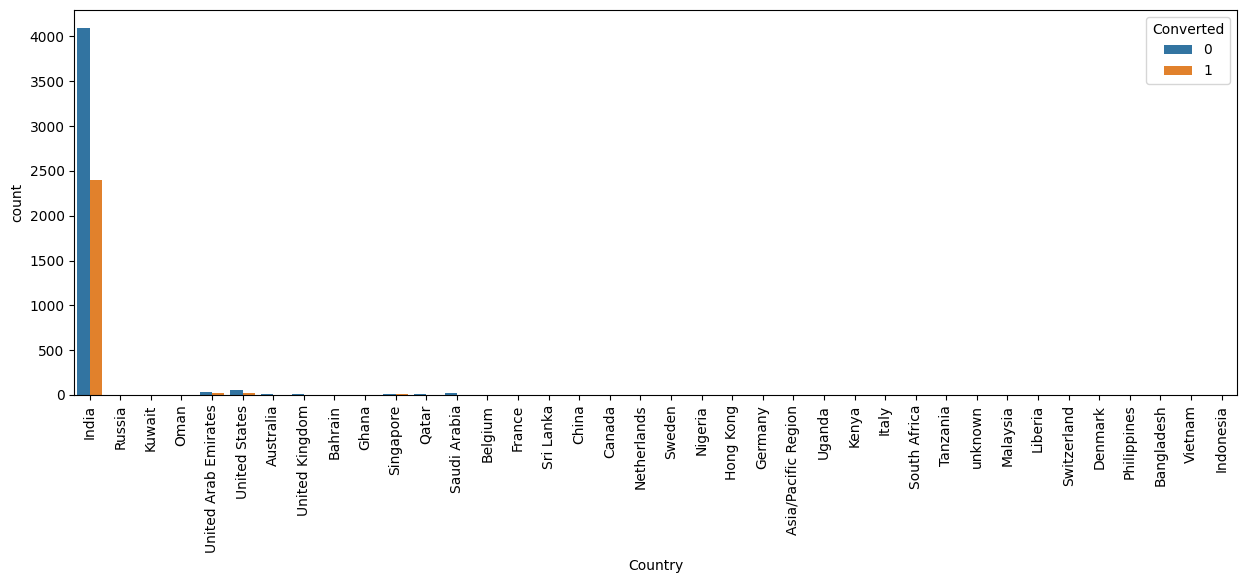

In [ ]:
#plotting spread of Country columnn
plt.figure(figsize=(15,5))
s1 = sns.countplot(x=leads_df.Country, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

As we can see the number of values for are quite high only for India and negligible for other countries. This column can be dropped

In [ ]:
leads_df.drop('Country', axis=1, inplace=True)

In [ ]:
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Let us update NaN with `Not Specified`

In [ ]:
leads_df.City.fillna('Not Specified', inplace=True)
leads_df['City'].value_counts(dropna=False)

Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

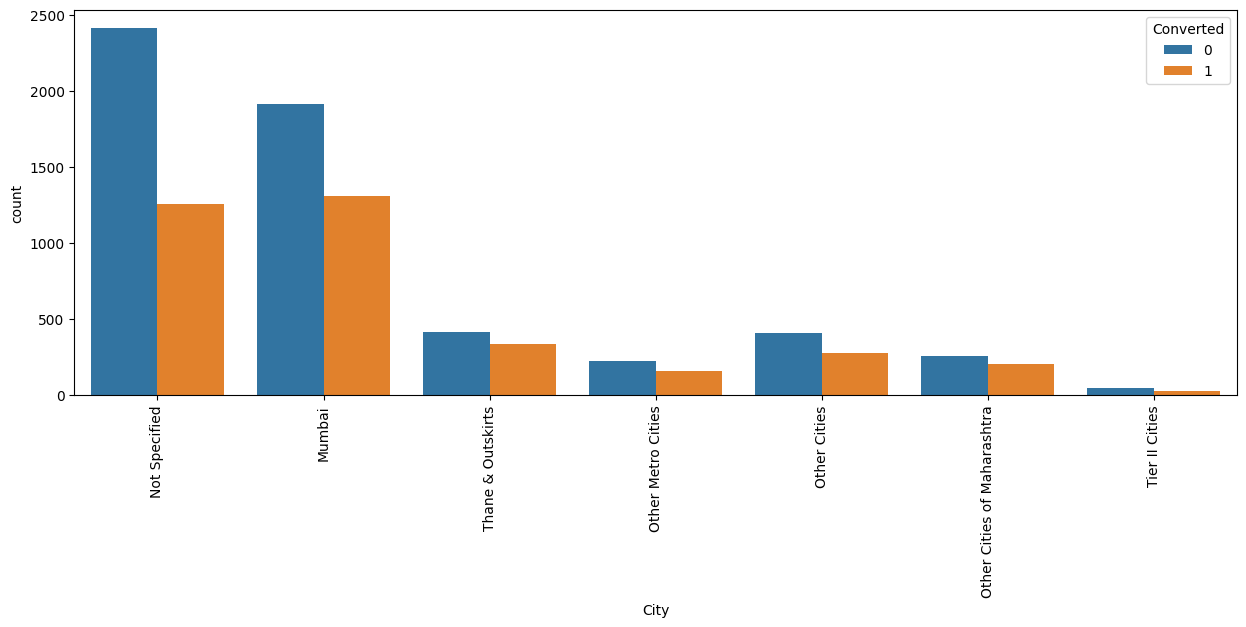

In [ ]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df.City, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Majority of the leads have not selected their City, however almost half of them have converted into paying customers.

In [ ]:
#checking value counts of Specialization column

leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
#Replace the NULL values with a relatable option for the Specialization column
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')

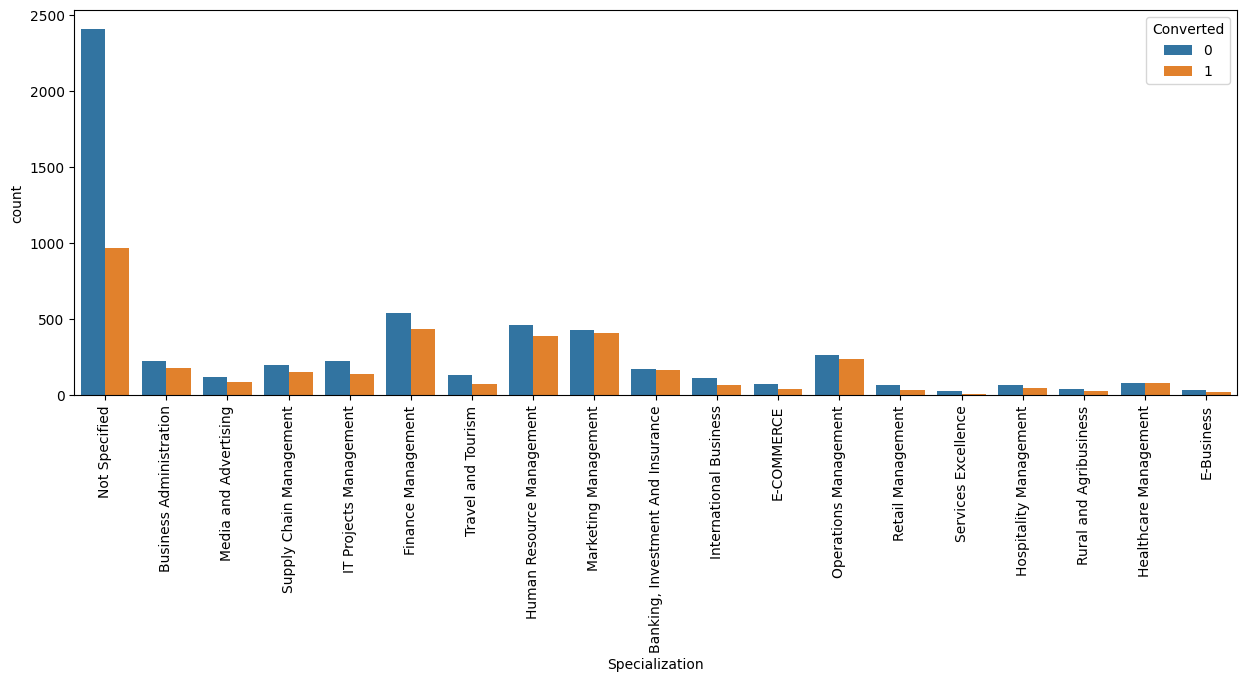

In [ ]:
#plotting spread of Specialization columnn

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.
- Also let us merge all Management specialization into one value

In [ ]:
#combining Management Specializations because they show similar trends

leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                                 'Marketing Management','Operations Management',
                                                                 'IT Projects Management','Supply Chain Management',
                                                                 'Healthcare Management','Hospitality Management',
                                                                 'Retail Management'] ,
                                                                'Management Specializations')

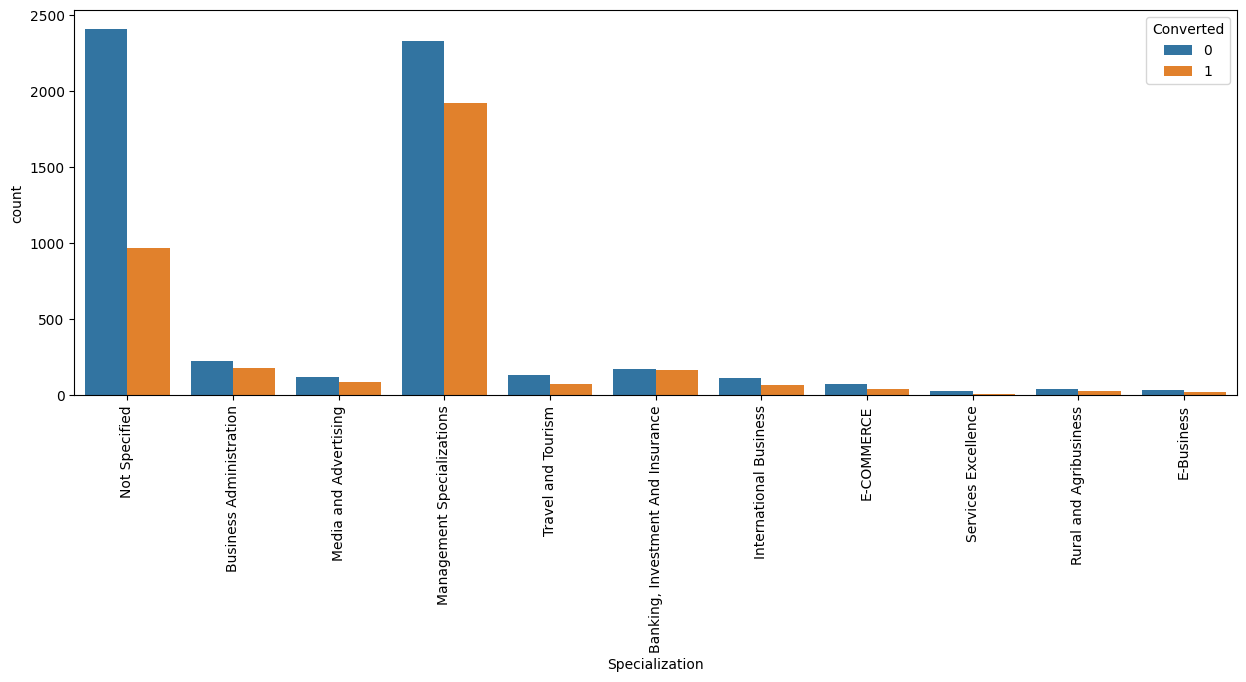

In [ ]:
#re-plotting spread of Specialization columnn

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#What is your current occupation

leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Let us update the NaN values with `Not Specified`

In [ ]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Specified')
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


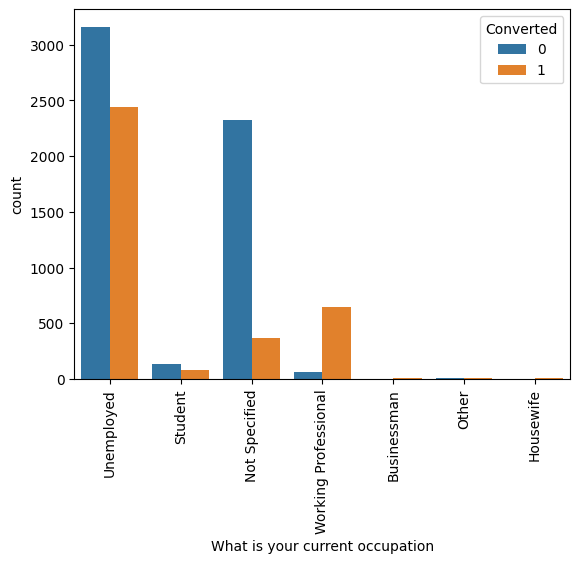

In [ ]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x=leads_df['What is your current occupation'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals have a high conversion rate.
- Number of leads that are Unemployed are the highest.
- A minor number of leads who have not specified their occupation have converted into paying customers

In [ ]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

If NaN is updated with the mode value `Better Career Prospects` then we get to see a heavy imbalance in the value distribution. Hence we can drop this column.

In [ ]:
leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,No,No,No,No,No,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,No,No,No,No,No,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [ ]:
#checking value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [ ]:
#replacing Nan values with "Not Specified"
leads_df.Tags.fillna('Not Specified', inplace=True)
leads_df['Tags'].value_counts(dropna=False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

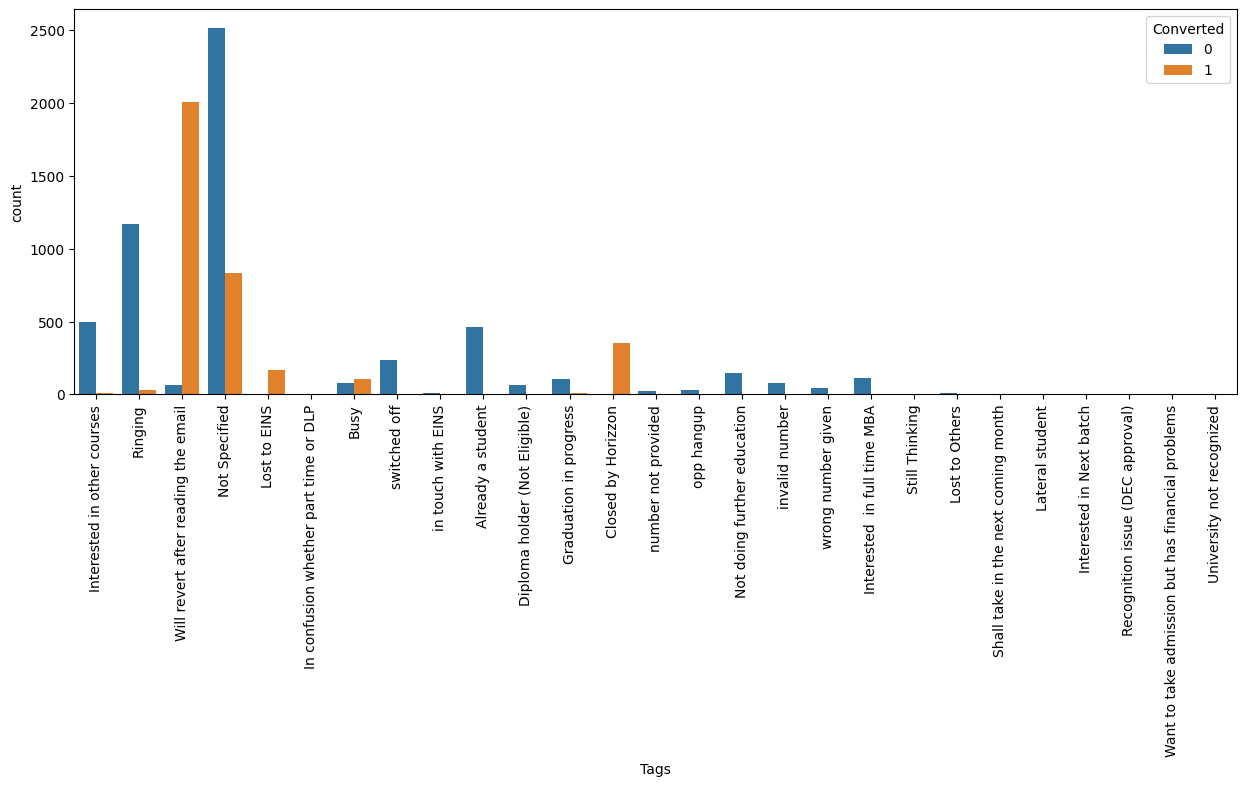

In [ ]:
#visualizing count of Tags

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Tags'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#replacing tags with low frequency with "Other Tags"
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                             'Diploma holder (Not Eligible)', 'Approached upfront','Graduation in progress',
                                             'number not provided', 'opp hangup','Still Thinking', 'Lost to Others',
                                             'Shall take in the next coming month','Lateral student',
                                             'Interested in Next batch', 'Recognition issue (DEC approval)',
                                             'Want to take admission but has financial problems',
                                             'University not recognized', 'switched off', 'Already a student',
                                             'Not doing further education', 'invalid number', 'wrong number given',
                                             'Interested  in full time MBA'],
                                            'Other Tags')


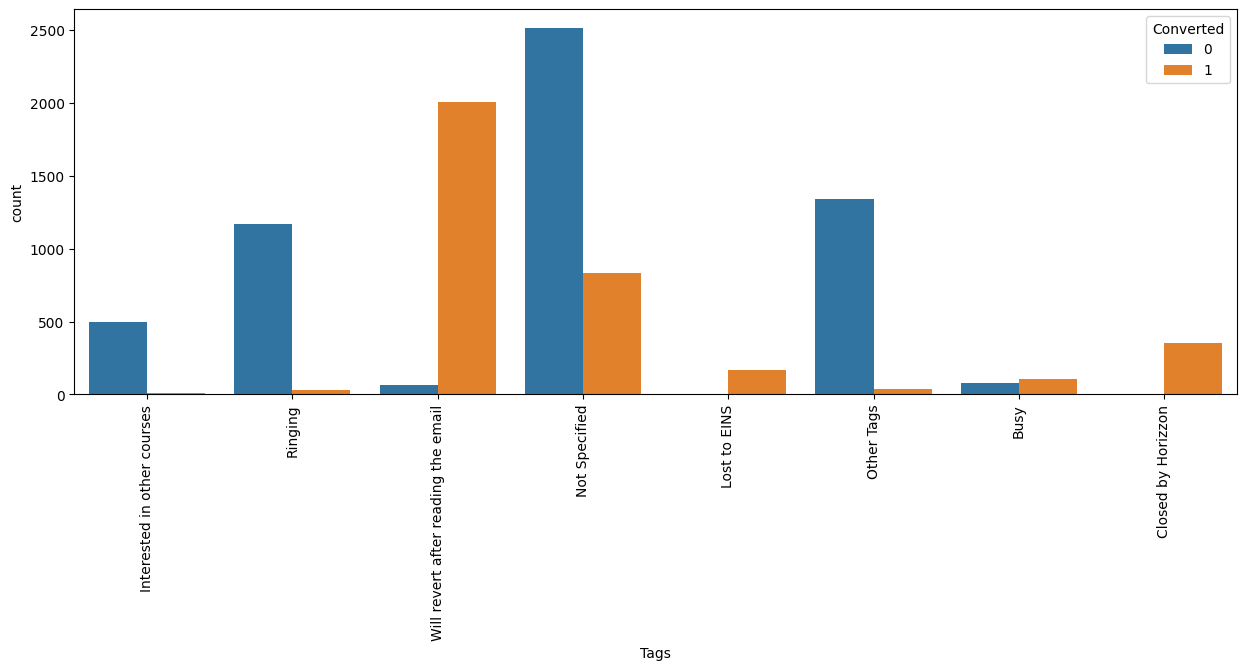

In [ ]:
#re-visualizing count of Tags

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Tags'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#checking percentage of missing values again
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [ ]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

The `Lead Source` column seem to be skewed towards certain values. There are a lot of low frequency values as well. Let us fix them by changing them to more meanful values.

In [ ]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release', 'youtubechannel',
                                                           'welearnblog_Home', 'WeLearn','blog','Pay per Click Ads',
                                                           'testone','NC_EDM', 'Live Chat'] ,
                                                          'Others')

leads_df['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

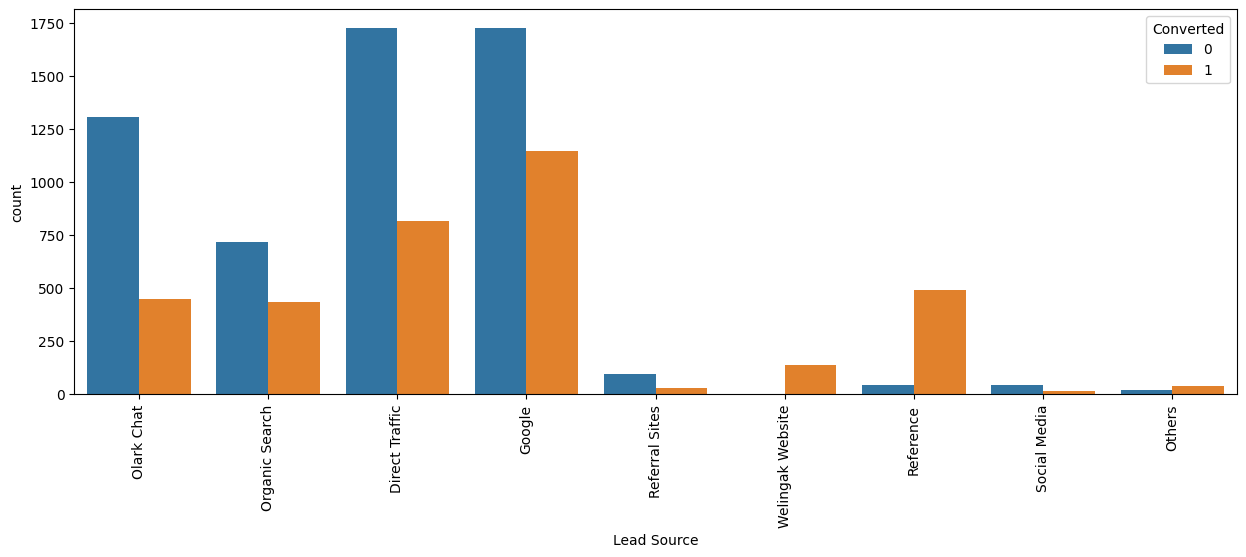

In [ ]:
#visualizing count of Lead Source
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads_df['Lead Source'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference:
- Maximum leads are generated from Google and Direct Traffic
- The conversion rate is very high for leads generated from Welingak Website and Reference
- The company should work on increasing their leads from Welingak Website and Reference
- The company should work on introducing better strategies for lead conversion from Olark Chat, Organic Search, Direct Traffic and Google

In [ ]:
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
#replacing NaN and combining low frequency values

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Others')
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation',
                                                               'Approached upfront', 'View in browser link Clicked',
                                                               'Email Marked Spam', 'Email Received',
                                                               'Resubscribed to emails', 'Visited Booth in Tradeshow'],
                                                              'Others')
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [ ]:
#Check the Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

Since the missing values are less than 2% we can choose to drop the NAN rows

In [ ]:
leads_df = leads_df.dropna()
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [ ]:
#Lead Origin
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

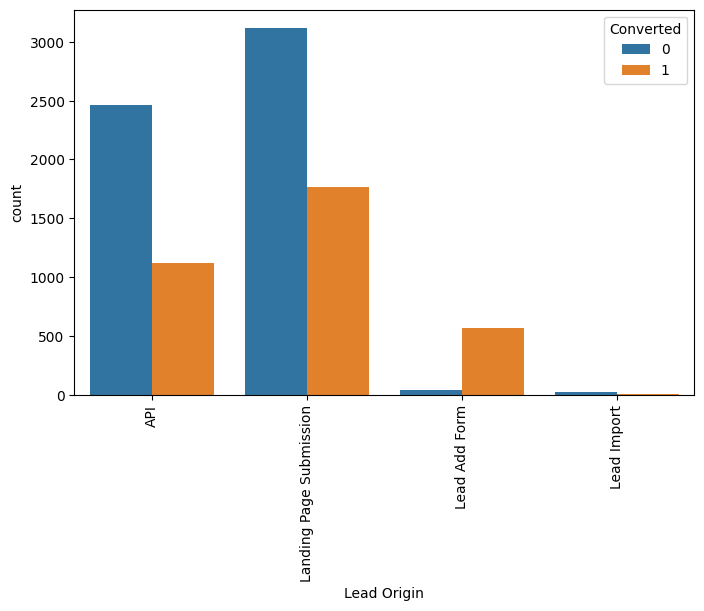

In [ ]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x=leads_df['Lead Origin'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference

- `Landing Page Submission` and `API` have the highest number of leads as well as conversion.
- `Lead Add Form` has a very high conversion rate but count of leads generated is not very high.
- `Lead Import` gets very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of `API` and `Landing Page Submission` origin and generate more leads from `Lead Add Form`.

In [ ]:
#checking value counts for Do Not Call
leads_df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [ ]:
# Since there is a heavy imbalance in the values of this column we can choose to drop it
leads_df.drop('Do Not Call', axis=1, inplace=True)

In [ ]:
#checking value counts for Do Not Email
leads_df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

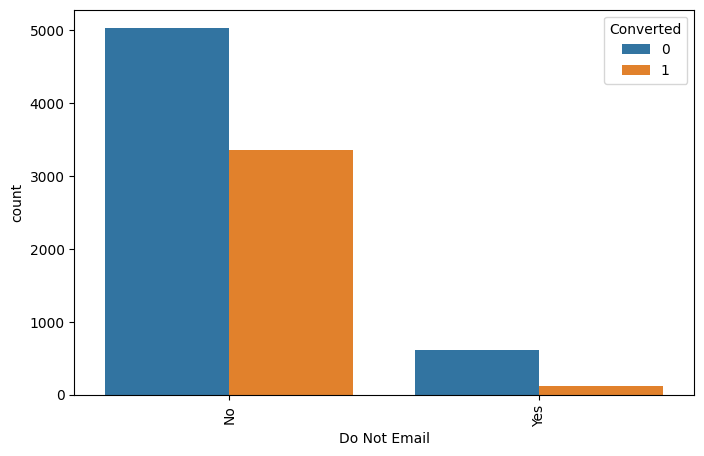

In [ ]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x=leads_df['Do Not Email'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Let us check the columns having variable imbalance

In [ ]:
cols_chk_imbal = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

for c in cols_chk_imbal:
  print(leads_df[c].value_counts(dropna=False))
  print('='*30)

No     9089
Yes      14
Name: Search, dtype: int64
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
No     9102
Yes       1
Name: X Education Forums, dtype: int64
No     9102
Yes       1
Name: Newspaper, dtype: int64
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
No     9096
Yes       7
Name: Through Recommendations, dtype: int64


Since the values in these columns are imbalanced we can choose to drop these columns

In [ ]:
leads_df.drop(cols_chk_imbal, axis=1, inplace=True)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [ ]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
# Clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',  'Email Marked Spam',
                                                                               'Unreachable', 'Unsubscribed',
                                                                               'Email Bounced', 'Resubscribed to emails',
                                                                               'View in browser link Clicked', 'Approached upfront',
                                                                               'Form Submitted on Website', 'Email Received'],
                                                                              'Other Activity')
leads_df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activity              160
Name: Last Notable Activity, dtype: int64

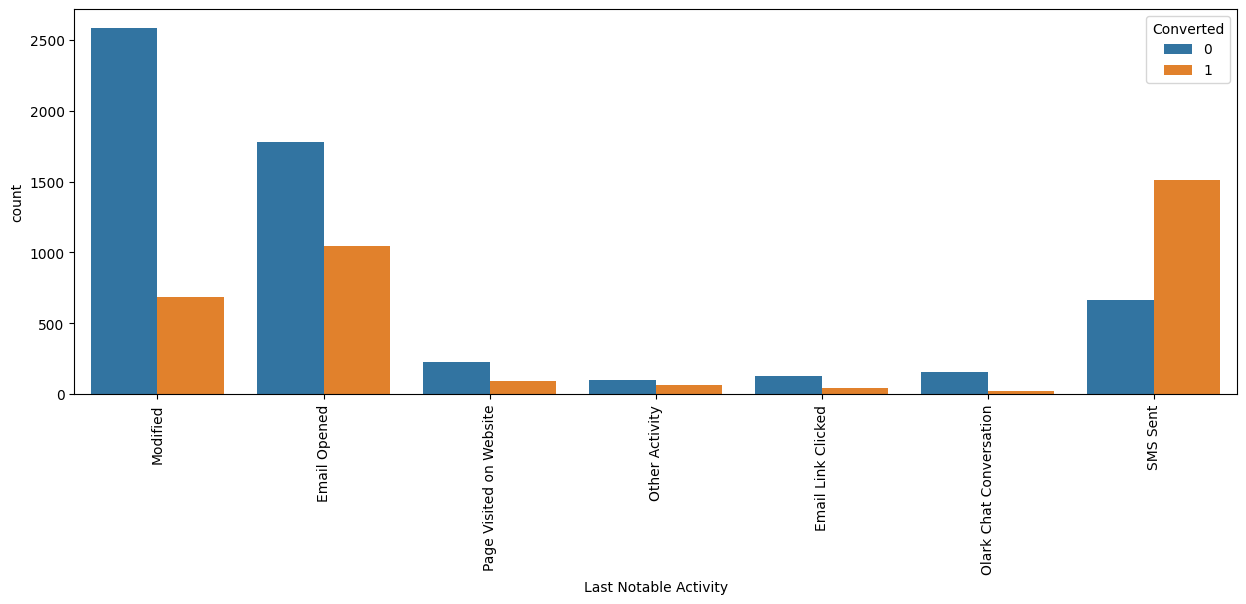

In [ ]:
plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# Checking the dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

We can see that the dataset seems to have cleaner values than before

#### Numeric attribute analysis

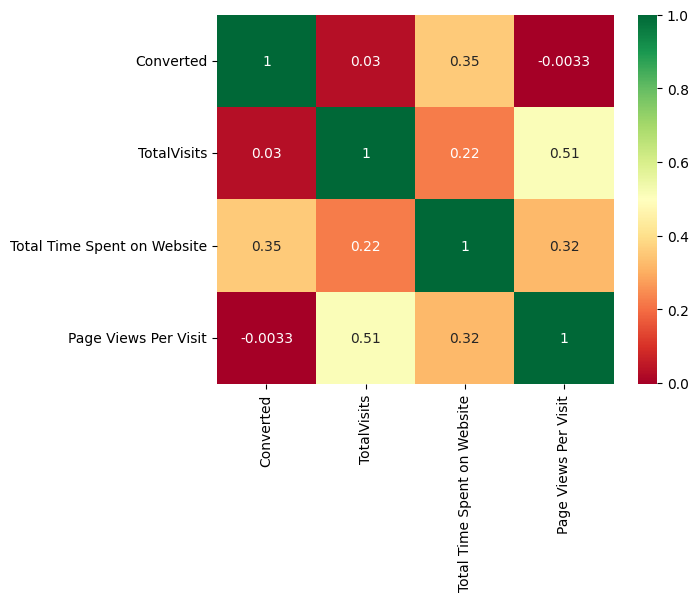

In [ ]:
# Check the correlation

sns.heatmap(leads_df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
# Check the percentage of data that has Converted Values = 1:

conv_perc = (sum(leads_df['Converted'])/len(leads_df))*100
conv_perc

38.02043282434362

The dataset shows that the current lead conversion rate is 38%

### Handling Outliers

In [ ]:
# Function for outlier treatment where top and bottom 1% records are removed
def outlier_treatment(df, col):
  Q3 = df[col].quantile(0.99)
  df = df[(df[col] <= Q3)]

  Q1 = df[col].quantile(0.01)
  df = df[(df[col] >= Q1)]

  plt.figure(figsize=(6,4))
  sns.boxplot(y=df[col])
  plt.show()

  return df

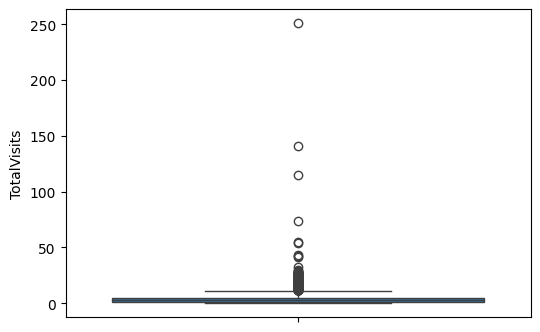

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

The above box plot shows that `TotalVisits` column has outliers and we need to treat them.

In [ ]:
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

We see a lot of variation of data between 95%, 99% and 100%

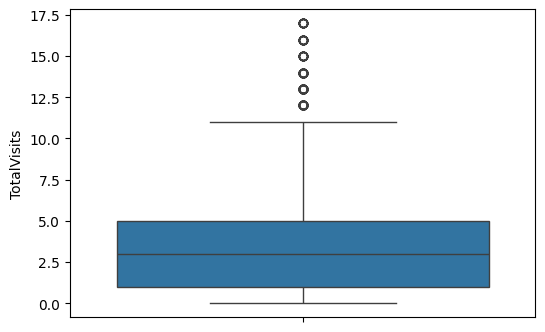

In [ ]:
leads_df = outlier_treatment(leads_df, 'TotalVisits')

In [ ]:
leads_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

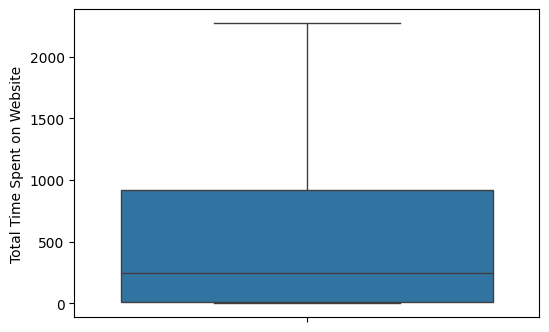

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

Though more than 75% of values are below 1000, there are no outliers in `Total Time Spent on Website` column

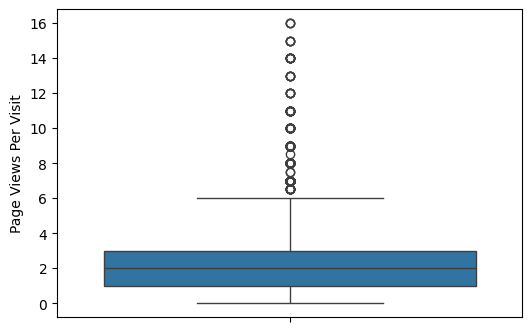

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

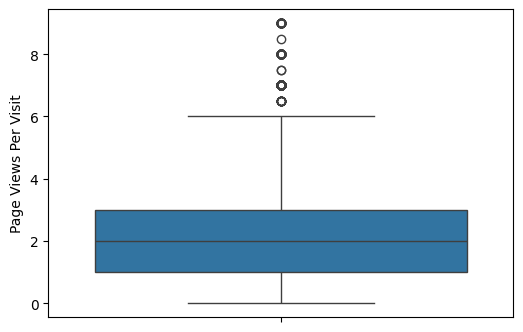

In [ ]:
leads_df = outlier_treatment(leads_df, 'Page Views Per Visit')

### Dummy variable creation

In [ ]:
#getting a list of categorical columns

cat_cols= leads_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We will convert the binary columns to 0/1 values

In [ ]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [ ]:
binary_cols =  ['A free copy of Mastering The Interview','Do Not Email']
leads_df[binary_cols] = leads_df[binary_cols].apply(binary_map)
leads_df[binary_cols].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
def create_dummy_cols(df, col, prefix, drop_col):
  if (drop_col == ''):
    dummy_df = pd.get_dummies(df[col], dtype='int', prefix=prefix, drop_first=True)
  else:
    dummy_df = pd.get_dummies(df[col], dtype='int', prefix=prefix)
    dummy_df = dummy_df.drop(drop_col, axis=1)

  df = pd.concat([df, dummy_df], axis=1)

  return df


In [ ]:
leads_df.City.value_counts(dropna=False)

Not Specified                  3578
Mumbai                         3109
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [ ]:
leads_df = create_dummy_cols(leads_df, 'Lead Origin', 'Lead_Origin', '')
leads_df = create_dummy_cols(leads_df, 'Lead Source', 'Lead_Source', 'Lead_Source_Others')
leads_df = create_dummy_cols(leads_df, 'Last Activity', 'Last_Activity', 'Last_Activity_Others')
leads_df = create_dummy_cols(leads_df, 'Specialization', 'Specialization', 'Specialization_Not Specified')
leads_df = create_dummy_cols(leads_df, 'What is your current occupation', 'Current_Occupation', '')
leads_df = create_dummy_cols(leads_df, 'Tags', 'Tags', 'Tags_Not Specified')
leads_df = create_dummy_cols(leads_df, 'City', 'City', 'City_Not Specified')
leads_df = create_dummy_cols(leads_df, 'Last Notable Activity', 'Last_Notable_Activity', 'Last_Notable_Activity_Other Activity')

leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Remove the Binary cols from the category cols list and then drop the original cols from the dataframe
cat_cols = list(cat_cols)
cat_cols.remove('A free copy of Mastering The Interview')
cat_cols.remove('Do Not Email')

leads_df = leads_df.drop(cat_cols, axis=1)
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


### Test - Train split and Logistic regression model building

In [ ]:
# Set X and y variables
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
X = leads_df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Set the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
# Verify if the dataset has been split correctly
print(X_train.shape)
print(X_test.shape)

(6267, 59)
(2686, 59)


In [ ]:
# Train dataset before scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
3385,0,2.0,289,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2273,0,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4234,0,4.0,111,4.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
945,0,3.0,415,3.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8689,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Scaling of non binary columns in train dataset
scaler = StandardScaler()
cols_to_scale = ['TotalVisits', 'Total Time Spent on Website',	'Page Views Per Visit']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
3385,0,-0.387896,-0.352398,-0.125473,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2273,0,-1.078701,-0.882395,-1.191680,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4234,0,0.302909,-0.678832,0.940734,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
945,0,-0.042493,-0.121327,0.407631,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8689,0,-1.078701,-0.882395,-1.191680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Model Building

In [ ]:
X_train.shape

(6267, 59)

In [ ]:
log_reg = LogisticRegression()

rfe = RFE(log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead_Origin_Landing Page Submission', False, 10),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 36),
 ('Lead_Source_Direct Traffic', False, 18),
 ('Lead_Source_Google', False, 21),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 20),
 ('Lead_Source_Reference', False, 26),
 ('Lead_Source_Referral Sites', False, 19),
 ('Lead_Source_Social Media', False, 17),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 6),
 ('Last_Activity_Email Bounced', False, 7),
 ('Last_Activity_Email Link Clicked', False, 35),
 ('Last_Activity_Email Opened', False, 30),
 ('Last_Activity_Form Submitted on Website', False, 39),
 ('Last_Activity_Olark Chat Conversation', False, 5),
 ('Last_Activity_Page Visited on Website',

In [ ]:
#list of RFE supported columns
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_SMS Sent', 'Current_Occupation_Not Specified',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
# Building Model #1

X_train_sm = sm.add_constant(X_train[rfe_cols])
log1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1107.9
Date:                Tue, 13 Feb 2024   Deviance:                       2215.9
Time:                        13:09:16   Pearson chi2:                 9.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6246
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1353      0.146      0.926      0.354      -0.151       0.422
Total Time Spent on Website                       1.0468      0.064     16.396      0.000       0.922       1.172
Lead_Origin_Lead Add Form                         1.6307      0.422      3.864      0.000       0.804       2.458
Lead_Source_Olark Chat                            1.0964      0.159      6.875      0.000       0.784       1.409
Lead_Source_Welingak Website                      2.5620      1.107      2.315      0.021       0.393       4.731
Last_Activity_SMS Sent                            2.0194      0.127     15.875      0.000       1.770       2.269
Current_Occupation_Not Specified                 -2.4830      0.155    -16.004      0.000      -2.787      -2.179
Tags_Busy                                        -1.1239      0.253     -4.444      0.000      -1.620      -0.628
Tags_Closed by Horizzon                           5.6115      1.027      5.466      0.000       3.599       7.624
Tags_Interested in other courses                 -3.2916      0.369     -8.926      0.000      -4.014      -2.569
Tags_Lost to EINS                                 5.5994      0.750      7.461      0.000       4.129       7.070
Tags_Other Tags                                  -4.4087      0.256    -17.206      0.000      -4.911      -3.906
Tags_Ringing                                     -5.1646      0.272    -18.975      0.000      -5.698      -4.631
Tags_Will revert after reading the email          2.7008      0.215     12.588      0.000       2.280       3.121
Last_Notable_Activity_Modified                   -1.5781      0.132    -11.936      0.000      -1.837      -1.319
Last_Notable_Activity_Olark Chat Conversation    -1.8635      0.455     -4.092      0.000      -2.756      -0.971
=================================================================================================================
"""

In the first model itself we can see that all the p-values are in the acceptable range of less than 0.05.
Let us verify by calculating the VIF

In [ ]:
#VIF Calculation

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last_Notable_Activity_Modified,1.84
1,Lead_Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.65
5,Current_Occupation_Not Specified,1.61
4,Last_Activity_SMS Sent,1.57
2,Lead_Source_Olark Chat,1.55
0,Total Time Spent on Website,1.46
3,Lead_Source_Welingak Website,1.30
7,Tags_Closed by Horizzon,1.23
10,Tags_Other Tags,1.21


The p-values and VIF, both seem to be in acceptable range. We can proceed with our model prediction

In [ ]:
#Predicting values
y_train_pred = res.predict(X_train_sm)
y_train_pred

3385    0.013458
2273    0.998988
4234    0.261368
945     0.001188
8689    0.048175
          ...   
5926    0.060555
5357    0.022357
5567    0.003873
916     0.003595
7509    0.576405
Length: 6267, dtype: float64

In [ ]:
# Re-shape y_train_pred to a 1D array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.01345795, 0.99898835, 0.26136835, ..., 0.00387291, 0.00359455,
       0.5764052 ])

In [ ]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_df.head()

,Converted,Converted_Prob
0,0,0.013458
1,1,0.998988
2,0,0.261368
3,0,0.001188
4,0,0.048175


Let us assume initial cut off as 0.5

In [ ]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_df['Predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Predicted
0,0,0.013458,0
1,1,0.998988,1
2,0,0.261368,0
3,0,0.001188,0
4,0,0.048175,0


### Model Evaluation

In [ ]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted )
confusion

array([[3690,  162],
       [ 246, 2169]])

In [ ]:
# Predicted       not_converted    converted
# Actual
# not_converted    3690             162
# converted         246             2169

In [ ]:
# Check the overall accuracy
print('Model accuracy is', round(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted), 4) * 100, '%')

Model accuracy is 93.49 %


In [ ]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

In [ ]:
# Calculating the sensitivity
sensitivity = round(TP/(TP+FN), 4) * 100
print('Model sensitivity is', sensitivity, '%')

Model sensitivity is 89.81 %


In [ ]:
# Calculating the specificity
specificity = round(TN/(TN+FP), 4) * 100
print('Model specificity is', specificity, '%')

Model specificity is 95.78999999999999 %


With the current cut odd at 0.5, we get the following results:
- Model Accuracy = 93.49%
- Model Sensitivity = 89.81%
- Model Specificity = 95.78%

### ROC Curve

The previous cut off was selected at random. Let us now plot the ROC curve to find the optimal cut off value

In [ ]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, drop_intermediate = False )

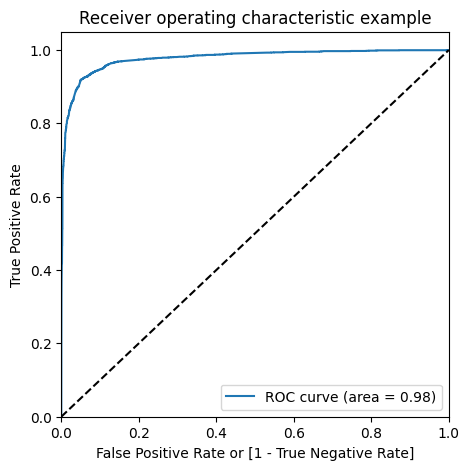

In [ ]:
# Call the ROC function
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

The area under the ROC curve is 0.98 which is a very good value.

In [ ]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013458,0,1,0,0,0,0,0,0,0,0,0
1,1,0.998988,1,1,1,1,1,1,1,1,1,1,1
2,0,0.261368,0,1,1,1,0,0,0,0,0,0,0
3,0,0.001188,0,1,0,0,0,0,0,0,0,0,0
4,0,0.048175,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
#from sklearn.metrics import confusion_matrix
#num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))

    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385352,1.000000,0.000000
0.1,0.1,0.867879,0.973913,0.801402
0.2,0.2,0.915111,0.949482,0.893562
0.3,0.3,0.928195,0.934161,0.924455
0.4,0.4,0.936812,0.920497,0.947040
0.5,0.5,0.934897,0.898137,0.957944
0.6,0.6,0.928834,0.865424,0.968588
0.7,0.7,0.924685,0.841408,0.976895
0.8,0.8,0.917824,0.812008,0.984164
0.9,0.9,0.900271,0.756522,0.990395


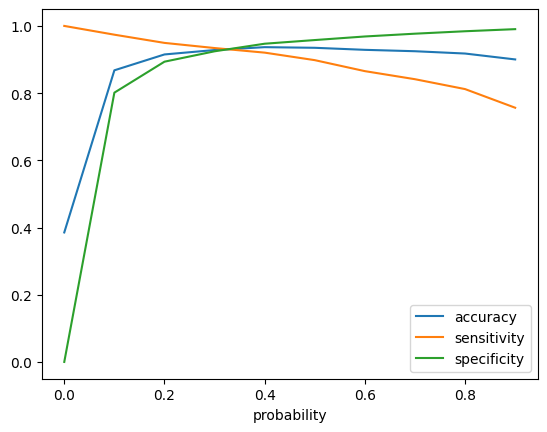

In [ ]:
# Plotting the accuracy, sensitivity, specificity
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the graph, we can see that the optimal cut off value is 0.3

In [ ]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013458,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.998988,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.261368,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.001188,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.048175,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check the overall accuracy
print('Overall model accuracy is', round(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted), 4) * 100, '%')

Overall model accuracy is 92.82000000000001 %


In [ ]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion

array([[3561,  291],
       [ 159, 2256]])

In [ ]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

In [ ]:
# Calculating the sensitivity
sensitivity = round(TP/(TP+FN), 4) * 100
print('Overall model sensitivity is', sensitivity, '%')

Overall model sensitivity is 93.42 %


In [ ]:
# Calculating the specificity
specificity = round(TN/(TN+FP), 4) * 100
print('Overall model specificity is', specificity, '%')

Overall model specificity is 92.45 %


With the cut off calculated by ROC curve at 0.3, we get the following results:

- Model Accuracy = 92.82%
- Model Sensitivity = 93.42%
- Model Specificity = 92.45%

### Prediction on Test Set

In [ ]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Not Specified,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
5098,0,-1.078701,-0.882395,-1.191680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4535,0,-0.387896,0.337149,-0.125473,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3190,0,0.302909,2.051845,0.940734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7457,0,0.648312,-0.528452,1.473838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6974,0,-1.078701,-0.882395,-1.191680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Since we did not drop any columns from the train set, we will continue directly with the test set

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[rfe_cols])
X_test_sm.head()

,const,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_SMS Sent,Current_Occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
5098,1.0,-0.882395,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4535,1.0,0.337149,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3190,1.0,2.051845,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7457,1.0,-0.528452,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6974,1.0,-0.882395,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column
y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.017320
1,1,0.506158
2,1,0.986646
3,0,0.001651
4,1,0.993492


In [ ]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.017320,0
1,1,0.506158,1
2,1,0.986646,1
3,0,0.001651,0
4,1,0.993492,1


In [ ]:
# Check the overall accuracy
print('Test model accuracy is', round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted), 4) * 100, '%')

Test model accuracy is 93.52000000000001 %


In [ ]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1580,  126],
       [  48,  932]])

In [ ]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

In [ ]:
# Calculating the sensitivity
sensitivity = round(TP/(TP+FN), 4) * 100
print('Test model sensitivity is', sensitivity, '%')

Test model sensitivity is 95.1 %


In [ ]:
# Calculating the specificity
specificity = round(TN/(TN+FP), 4) * 100
print('Test model specificity is', specificity, '%')

Test model specificity is 92.61 %


Applying the cut off of 0.3 on the test model, we get the following results:

- Model Accuracy = 93.52%
- Model Sensitivity = 95.1%
- Model Specificity = 92.61%

The results show that the model is good and we can use it for our predictions

### Inference:
The variables that matter the most in converting leads to potential buyers are:

1) **Last Notable Activity :**
	When leads modify their application, it shows they are interested in buying the course.

2) **Lead Origin:**
	Leads generated from the Lead Add Form have a higher probability of conversion

3) **Tags:**
	Leads that have been tagged to revert after reading email are bound to be potential buyers

4) **Current Occupation:**
	Leads who have chosen not to disclose their current occupation are also bound to be converted.

5) **Lead Source:**
	Leads from Olark chat and Weligak website should be targeted on priority